# Kuramoto model

Let us first define the **phase deviation model**
\begin{equation}
\partial_t\phi_i = \omega_i + \sum_{j=1}^n H_{ij}(\phi_j-\phi_i)
\end{equation}
The synchronization theorem for oscillatory neutral networks states that if
$\omega_i=\omega$ for each $i$, and $H_{ij}(x) = -H_{ji}(-x)$, then the phase deviation
model converges to a phase locked pattern.

The Kuramoto model is defined as
\begin{equation}
\partial_t\phi_i = \omega_i + \sum_{j=1}^n s_{ij}
\sin(\phi_j-\phi_i+\Psi_{ij})
\end{equation}
Then it is a phase deviation model with
\begin{align}
H_{ij}(x)&=s_{ij}\sin(x+\Psi_{ij})\\
&=\text{Im}(s_{ij}e^{i(x+\Psi_{ij})})\\
&=\text{Im}(c_{ij}e^{ix})
\end{align}
where
\begin{equation}
c_{ij}=s_{ij}e^{i\Psi_{ij}}
\end{equation}
Then, the condition for the synchronization theorem is
\begin{equation}
c_{ij}^* = c_{ji}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def kuramoto_derivative (phi,t,n,omega,c):
    
    phi_dot = omega*np.ones_like(phi)
    
    for i in range(n):
        for j in range(n):
            phi_dot[i] += (c[i,j]*np.exp(1j*(phi[j]-phi[i]))).imag
    
    return phi_dot

In [3]:
n = 6
omega = 1
c = np.ones((n,n))

time = np.arange(0,5,0.1)

phi_0 = np.linspace(0,10,n)

sol = odeint(kuramoto_derivative, phi_0, time, args=(n,omega,c))

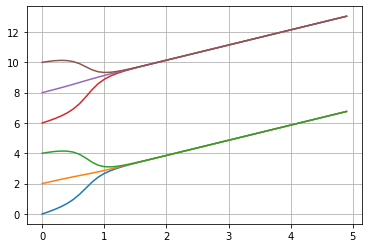

In [4]:
for i in range(n):
    plt.plot(time,sol[:,i])
plt.grid()

## Pattern to be memorized

In [5]:
n = 10

In [6]:
pattern = np.zeros(10)
pattern[::2] = 1

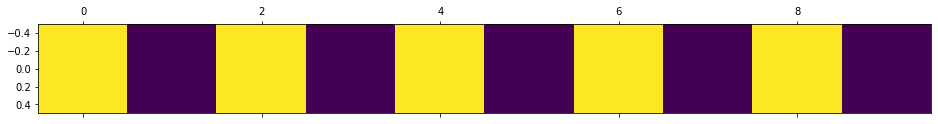

In [7]:
plt.matshow(pattern[np.newaxis,])

## Initial condition

In [8]:
initial_condition = np.random.random(10)

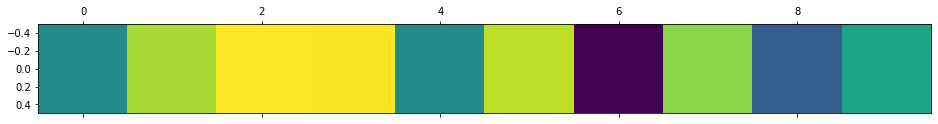

In [9]:
plt.matshow(initial_condition[np.newaxis,])

## Implement rule

In [10]:
c = np.zeros((n,n),dtype=complex)
for i in range(n):
    for j in range(n):
        c[i,j] = 1/n * pattern[i].conj() * pattern[j]

## Try our luck

In [11]:
omega = 0
time = np.arange(0,50,0.1)
sol = odeint(kuramoto_derivative, initial_condition, time, args=(n,omega,c))

/home/fp/.python/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


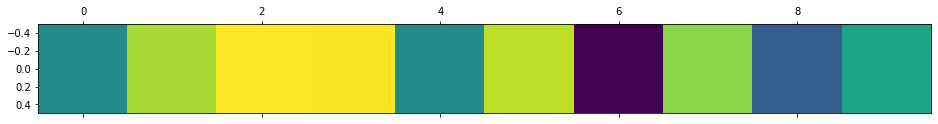

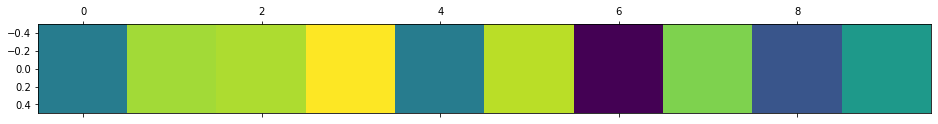

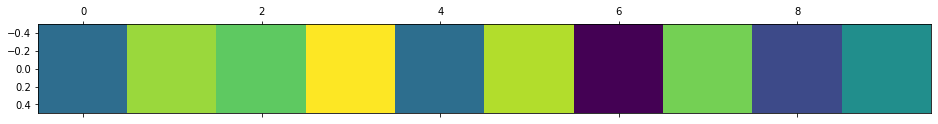

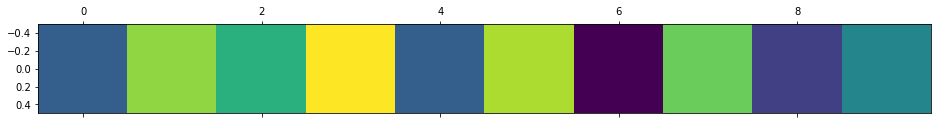

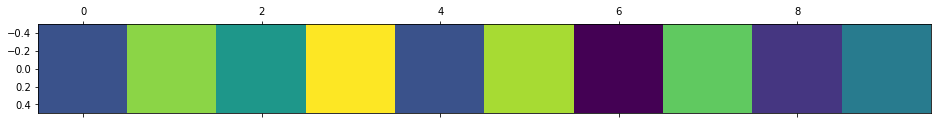

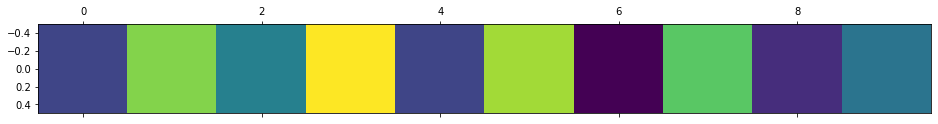

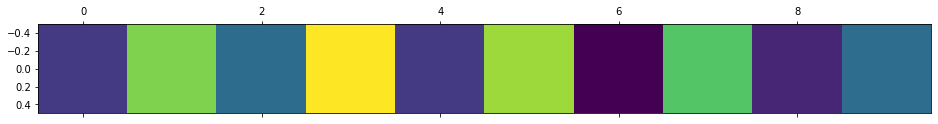

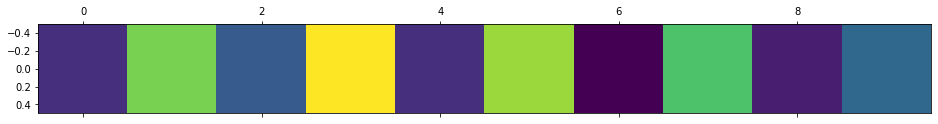

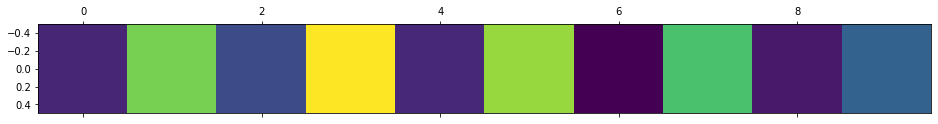

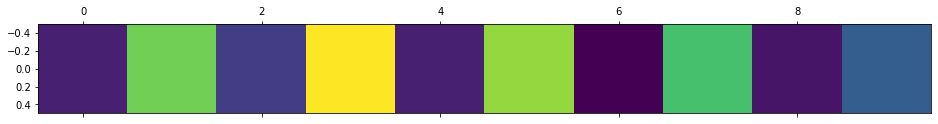

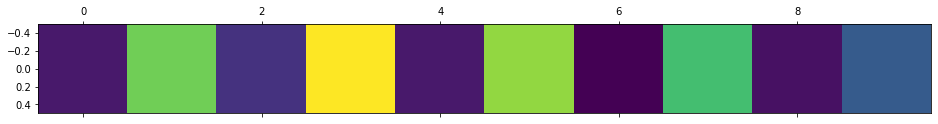

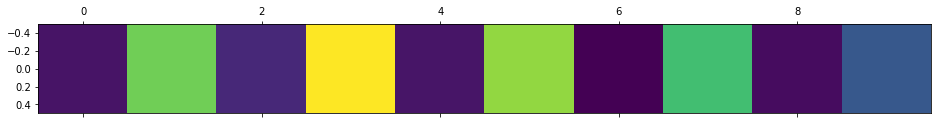

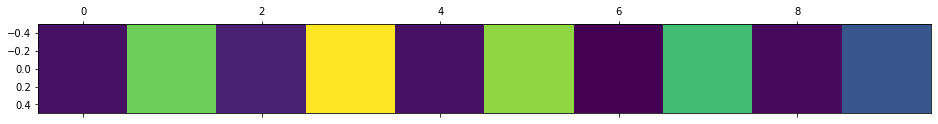

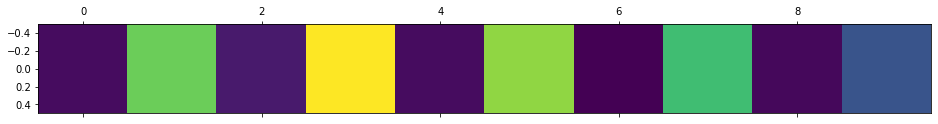

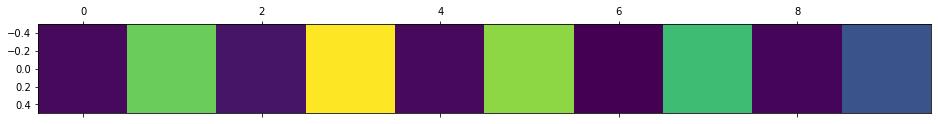

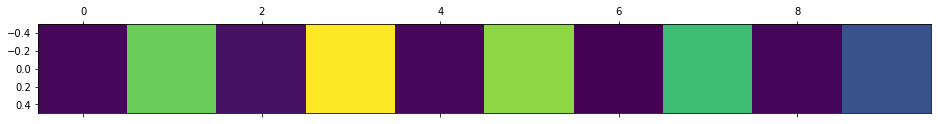

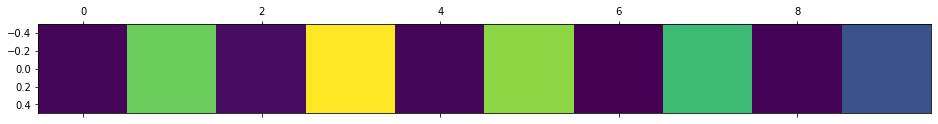

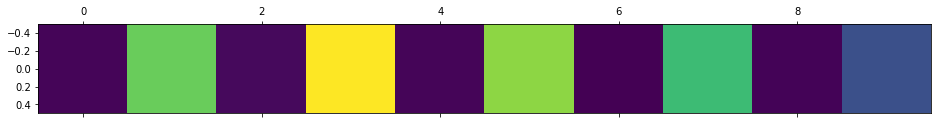

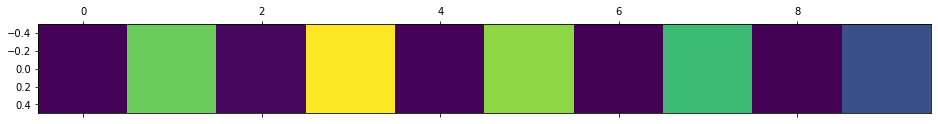

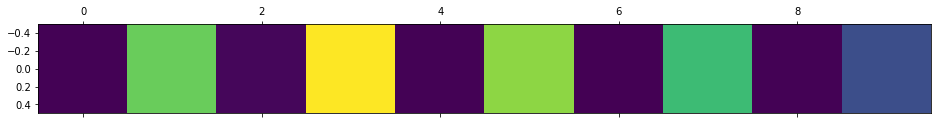

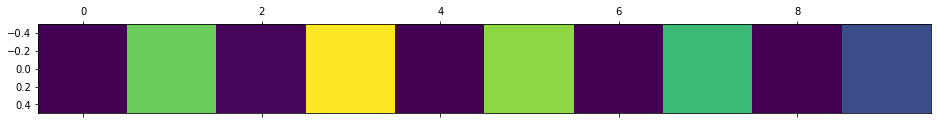

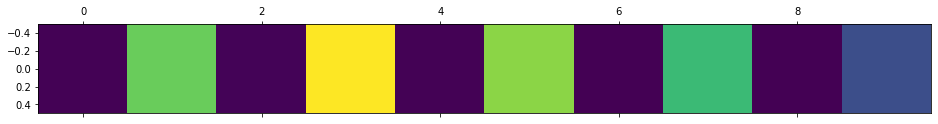

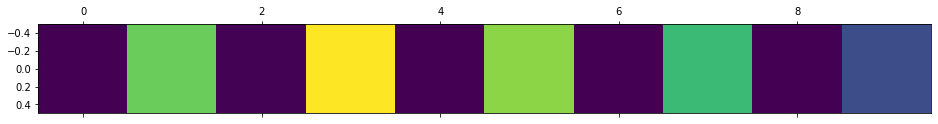

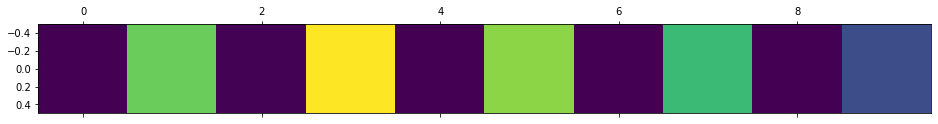

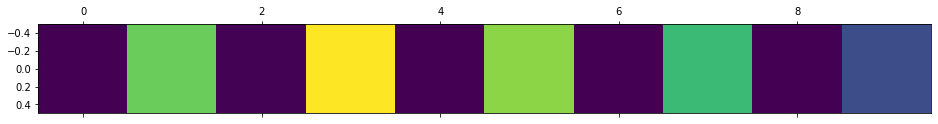

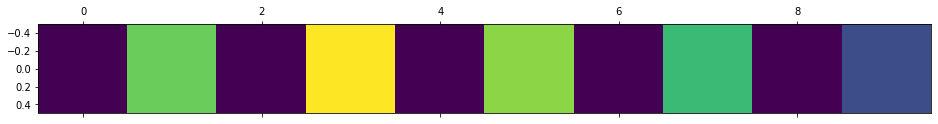

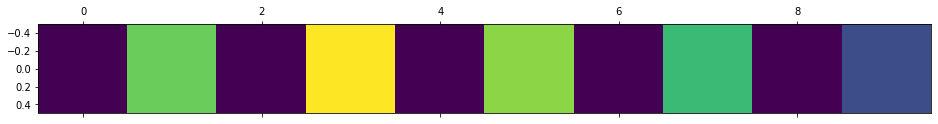

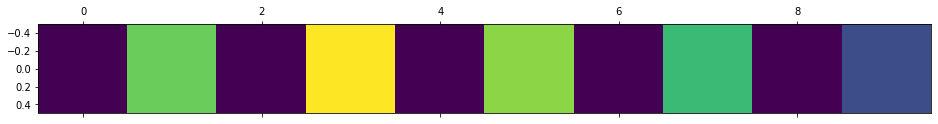

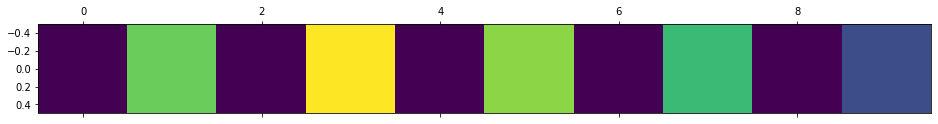

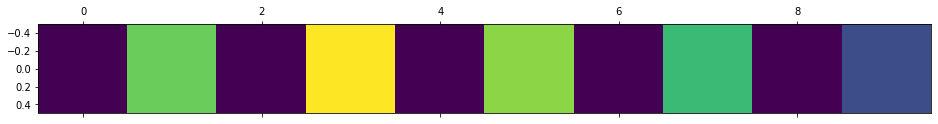

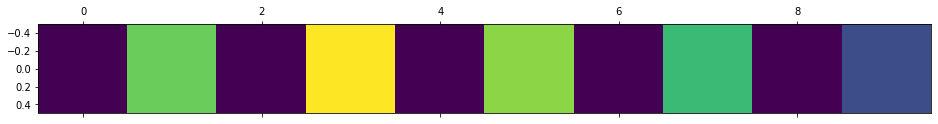

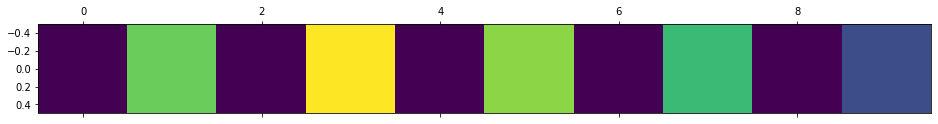

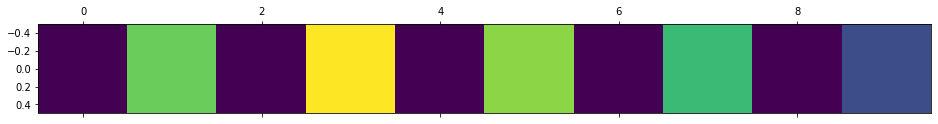

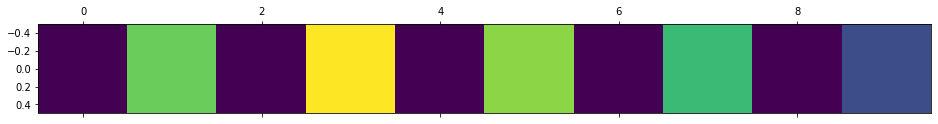

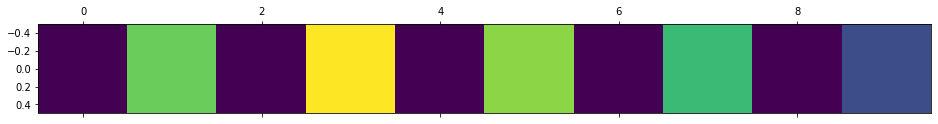

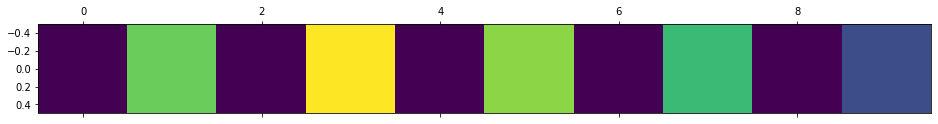

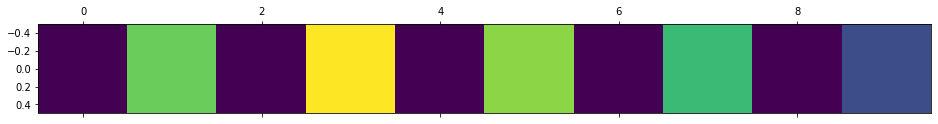

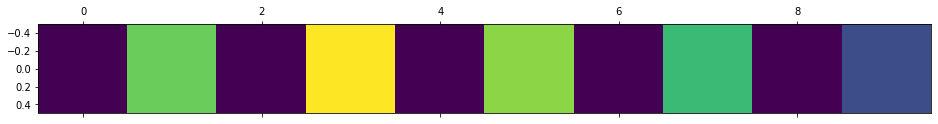

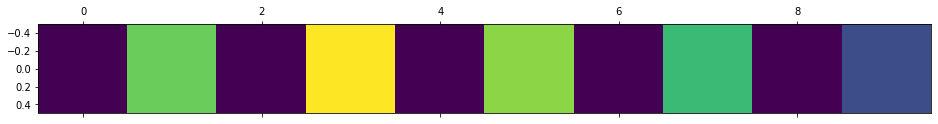

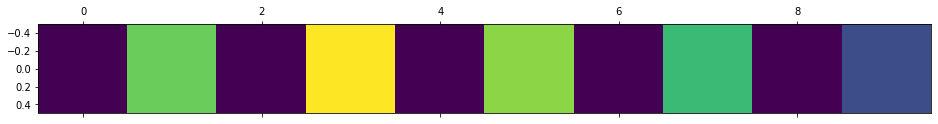

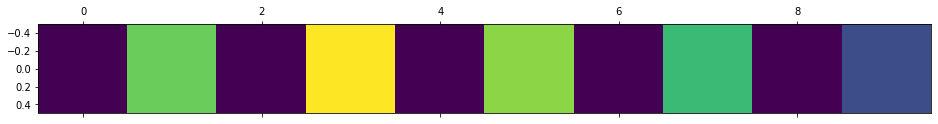

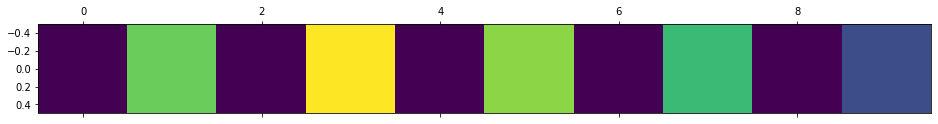

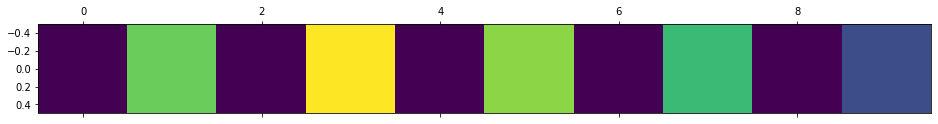

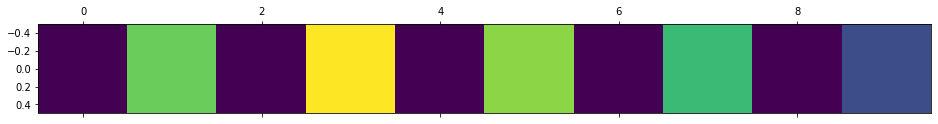

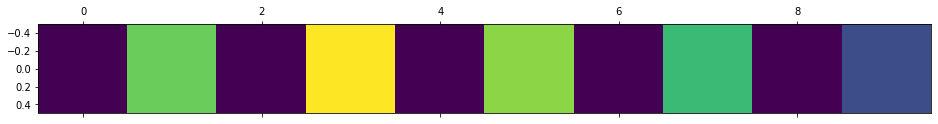

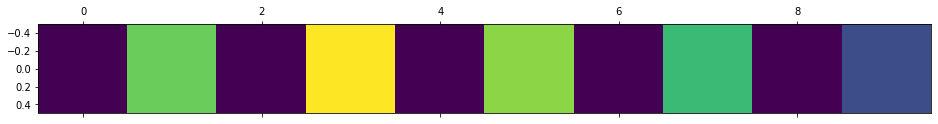

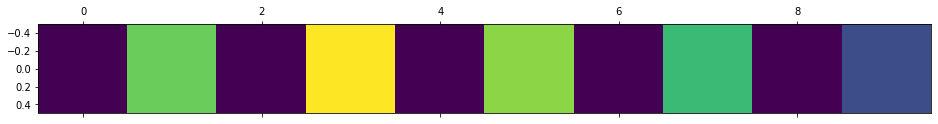

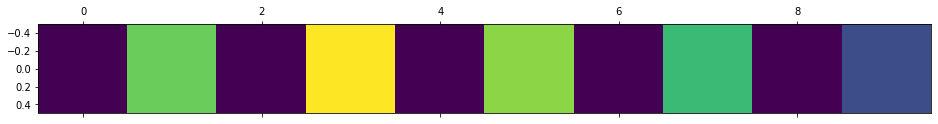

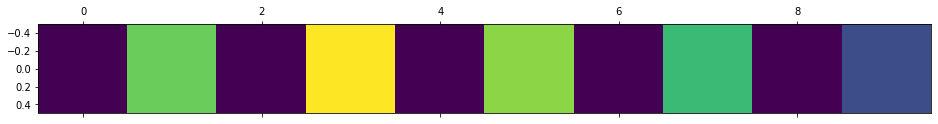

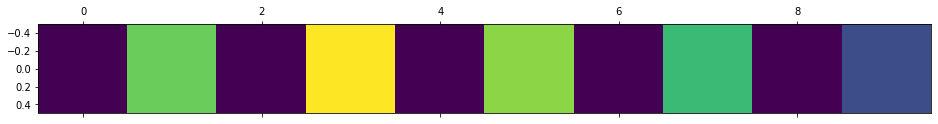

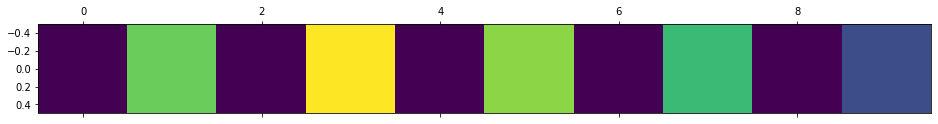

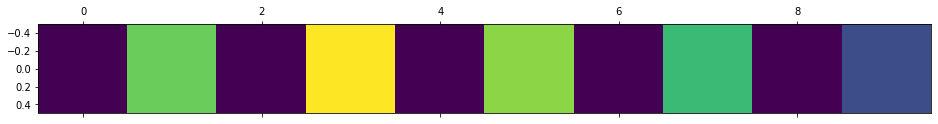

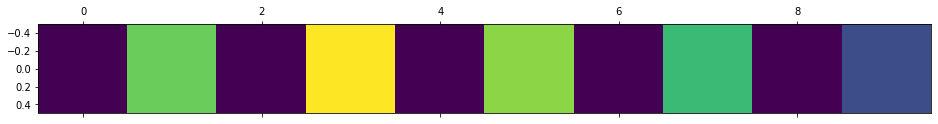

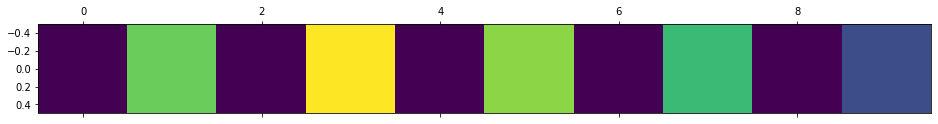

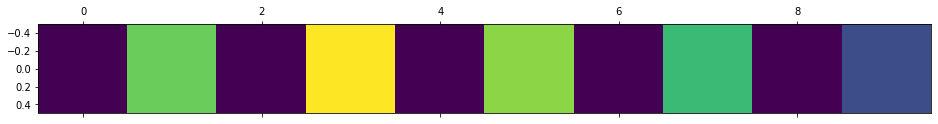

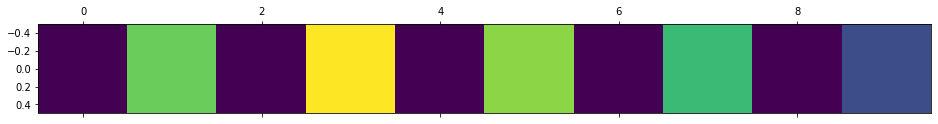

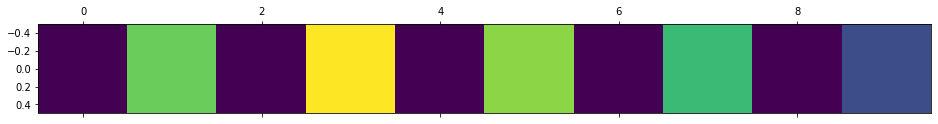

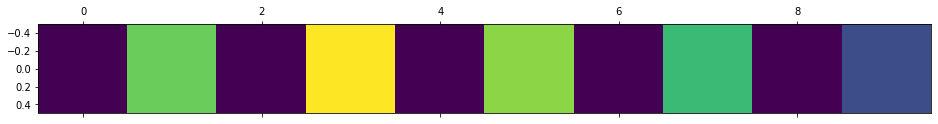

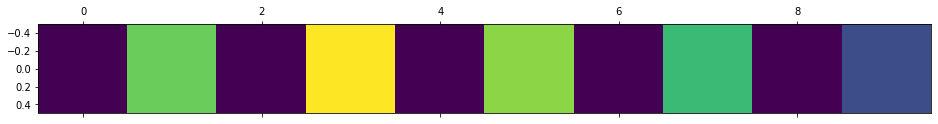

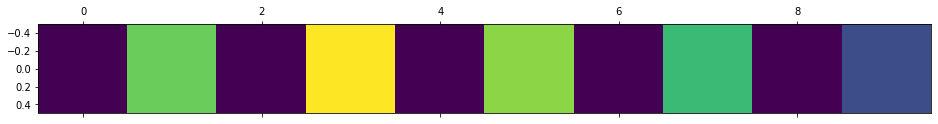

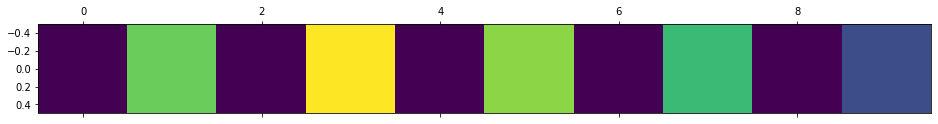

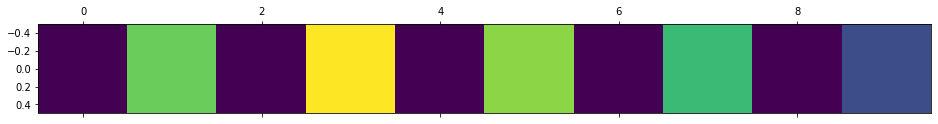

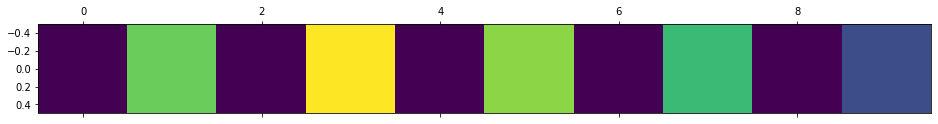

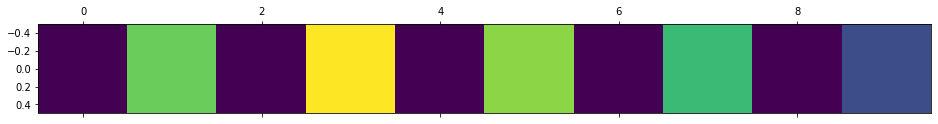

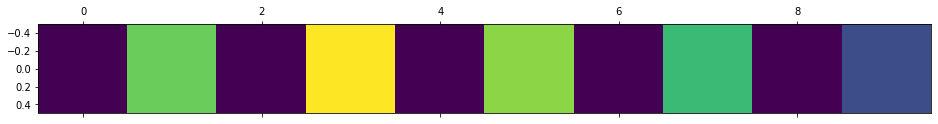

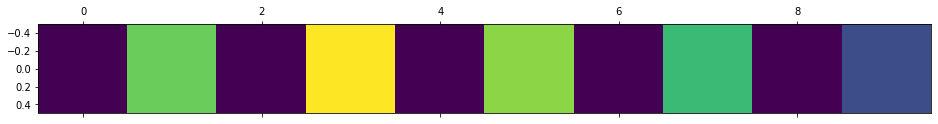

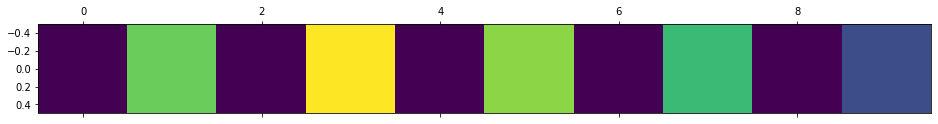

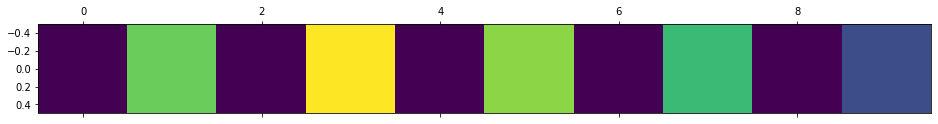

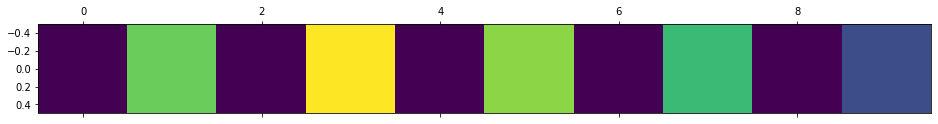

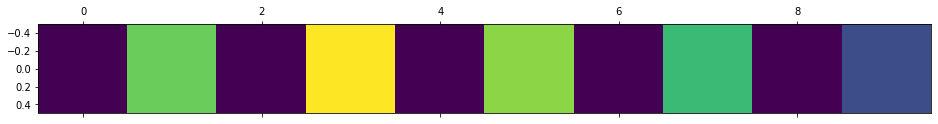

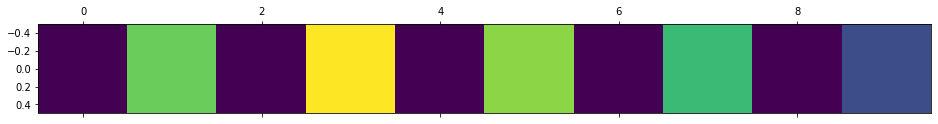

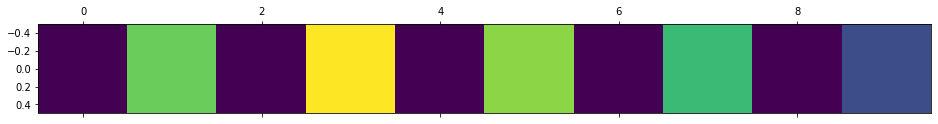

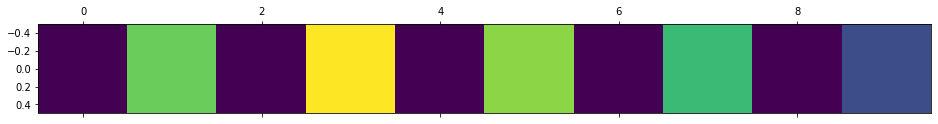

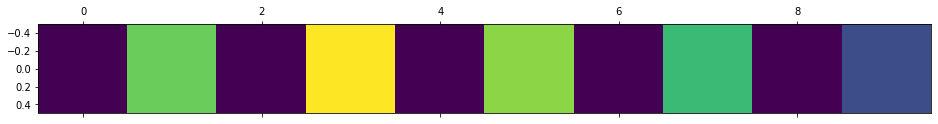

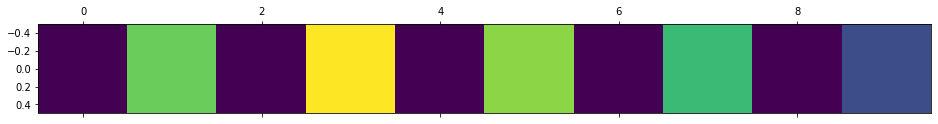

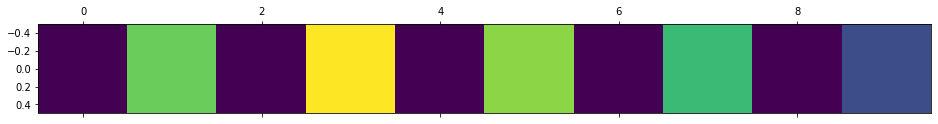

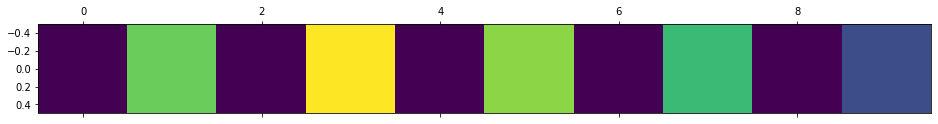

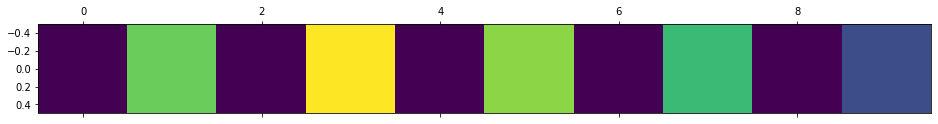

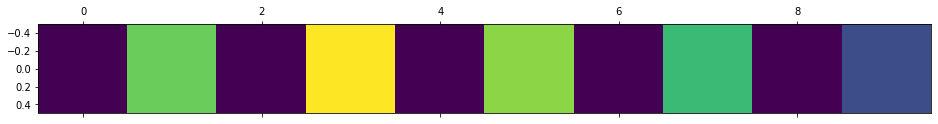

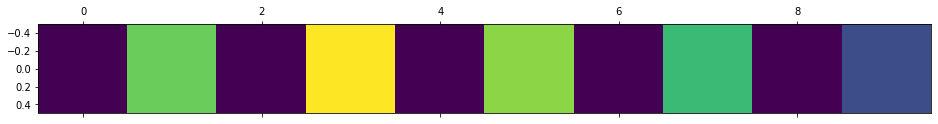

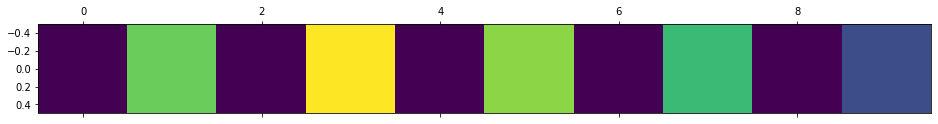

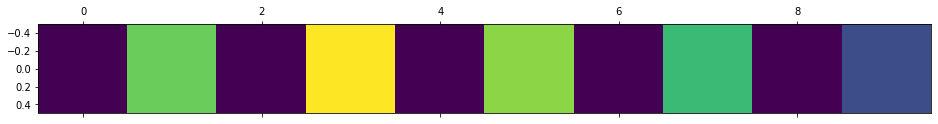

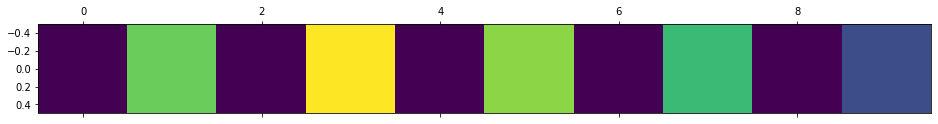

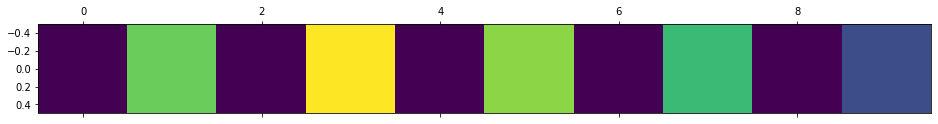

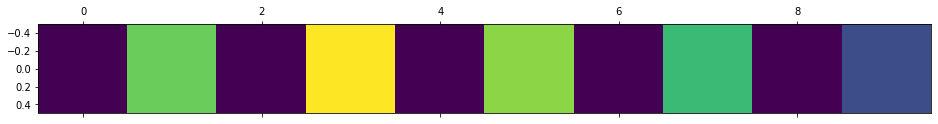

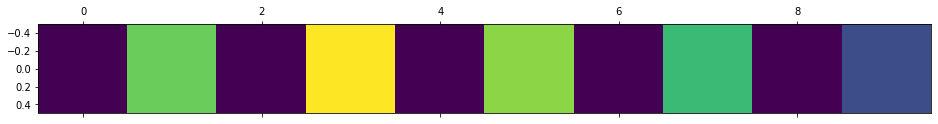

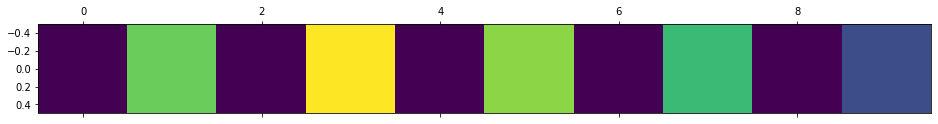

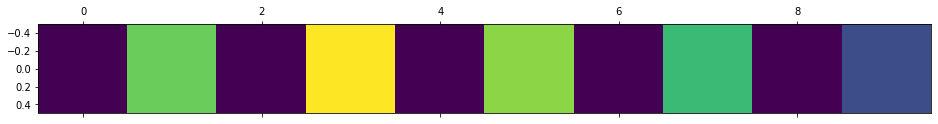

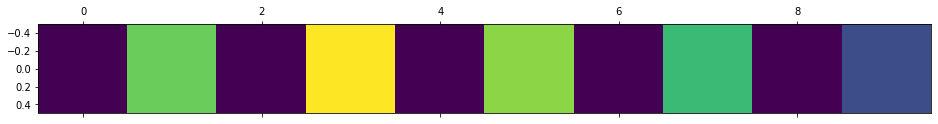

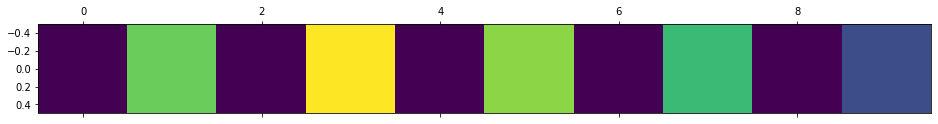

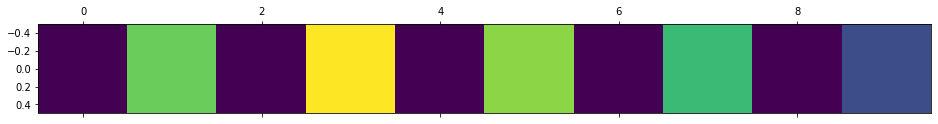

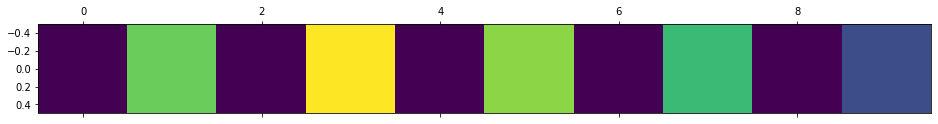

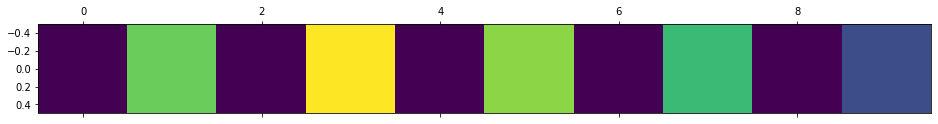

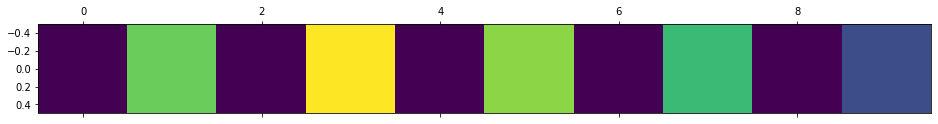

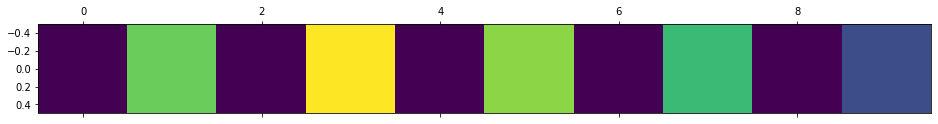

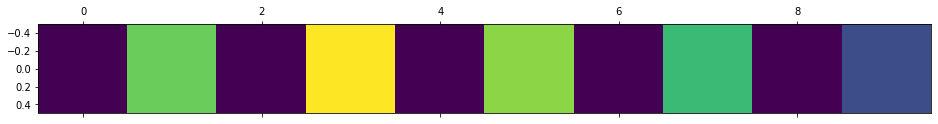

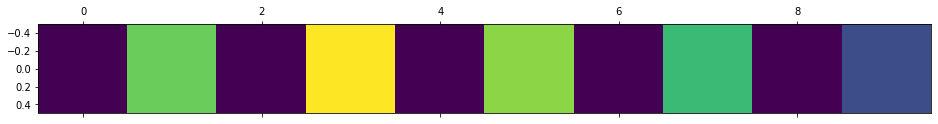

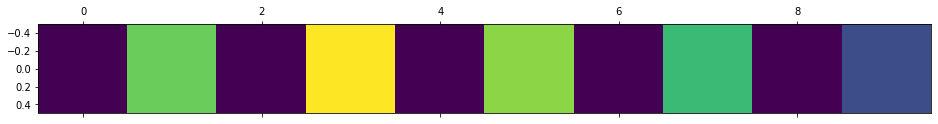

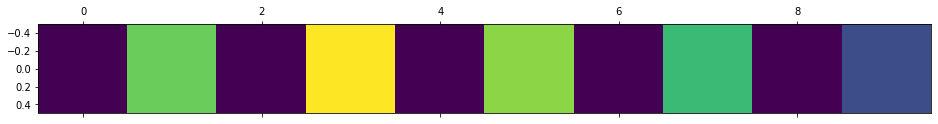

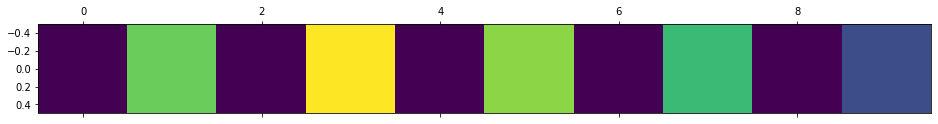

In [12]:
for t in range(len(time))[::5]:
    plt.matshow(sol[t,:][np.newaxis,])